this code take a video and detect the players and the ball and also will count the number of players of each team

In [ ]:
#Project_2

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
cap = cv2.VideoCapture("Example.mp4")
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(f'the total frames of this vid is: {total_frames}')

for i in range(0, 96):
   cap.set(1, i)
   ret, still = cap.read()
   cv2.imwrite(f'{"Example"}_frame{i}.jpg', still)

the total frames of this vid is: 5187.0


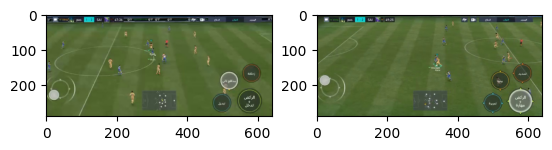

In [ ]:
images =[]
for i in range (0,96):
  img = cv2.imread(f'Example_frame{i}.jpg')
  img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  images.append(img2)

# print("Enter the frame number that you want to see [0 >> 95] ")
# fn = int(input("The number is: "))
# while True:
#   if fn < 0 or fn > 95:
#     print("Enta msh bt3rf tqra2 wala ehhh ba2olak between [0 and 95]")
#     fn= int(input("The number is: "))
#   else:
#     break
plt.subplot(1, 2, 1)
plt.imshow(images[0])

plt.subplot(1, 2, 2)
plt.imshow(images[95])
plt.show()

# plt.subplot(1, 3, 3)
# plt.imshow(img2)

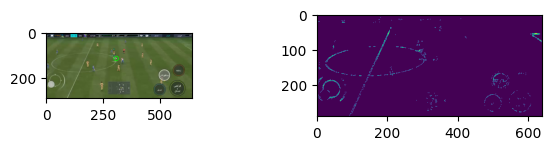

In [ ]:
# region_range
lower_r = 76,119,80
upper_r = 120,255,120
mask_r = cv2.inRange(images[0], lower_r, upper_r)

plt.subplot(1, 3, 1)
plt.imshow(images[0])

plt.subplot(1, 2, 2)
plt.imshow(mask_r)

plt.show()
# print(images[0][83:177,19:311][0])
# print(images[0][83:177,19:311][1])

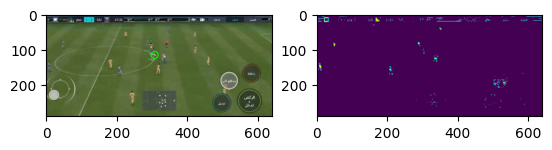

In [ ]:
center_coordinates = (307, 115)
radius = 10
color = (0, 255, 0)
thickness = 2
img = images[0]
mask = cv2.inRange(img, (10,150,10), (0,250,0))
cv2.circle(img, center_coordinates, radius, color, thickness)
mask = cv2.inRange(img, lower1, upper1)
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(mask)

plt.show()

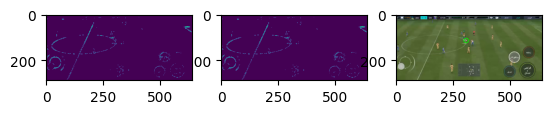

In [ ]:
lower_r = 76,119,80
upper_r = 120,255,120
mask_ball= cv2.inRange(img, lower_r, upper_r)
plt.subplot(1,3,2)
plt.imshow(mask_ball)

plt.subplot(1,3,1)
plt.imshow(mask_r)

plt.subplot(1,3,3)
plt.imshow(img)

plt.show()

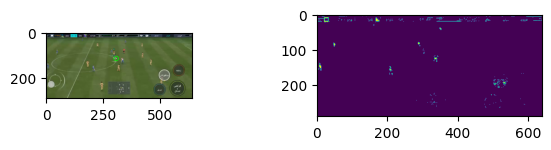

In [ ]:
# blue_range
lower_b = 50,0,100
upper_b = 170,120,255

mask_b = cv2.inRange(images[0], lower_b, upper_b)

plt.subplot(1, 3, 1)
plt.imshow(images[0])

plt.subplot(1, 2, 2)
plt.imshow(mask_b)

plt.show()

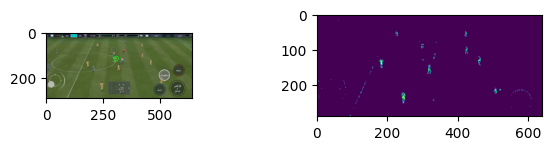

In [ ]:
# yellow_range
lower_y = 139, 127, 66
upper_y = 249, 238, 115
mask_y = cv2.inRange(images[0], lower_y, upper_y)

plt.subplot(1, 3, 1)
plt.imshow(images[0])

plt.subplot(1, 2, 2)
plt.imshow(mask_y)

plt.show()

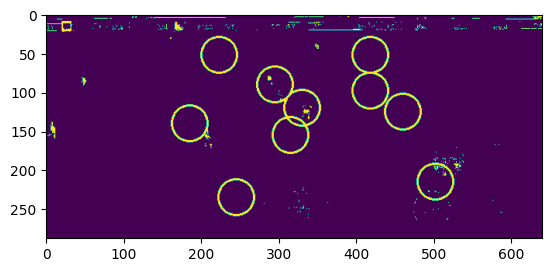

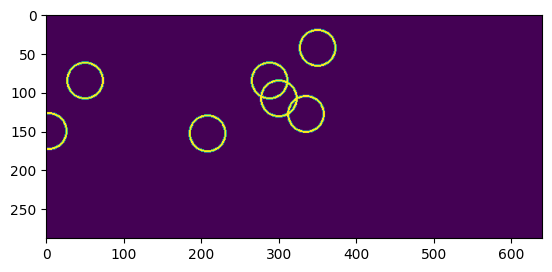

In [ ]:
#The Blue and Yellow Team detection
lower1 = 50,0,100
upper1 = 170,120,255
mask = cv2.inRange(images[0], lower1, upper1)
center = (502, 215)
radius = 23
cv2.circle(mask, center, radius, (255, 242, 0), 2)
cv2.circle(mask, (315, 155), radius, (255, 242, 0),2)
cv2.circle(mask, (330, 120), radius, (255, 242, 0),2)
cv2.circle(mask, (460, 125), radius, (255, 242, 0),2)
cv2.circle(mask, (418, 98), radius, (255, 242, 0),2)
cv2.circle(mask, (418, 52), radius, (255, 242, 0),2)
cv2.circle(mask, (295, 90), radius, (255, 242, 0),2)
cv2.circle(mask, (245, 235), radius, (255, 242, 0),2)
cv2.circle(mask, (185, 140), radius, (255, 242, 0),2)
cv2.circle(mask, (223, 52), radius, (255, 242, 0),2)
plt.imshow(mask)
plt.show()

lower2 = 139, 127, 66
upper2 = 120, 122, 220
mask2 = cv2.inRange(images[0], lower2, upper2)
cv2.circle(mask2, (208,153), radius, (159, 252, 253), 2)
cv2.circle(mask2, (3,150), radius, (159, 252, 253), 2)
cv2.circle(mask2, (50,85), radius, (159, 252, 253), 2)
cv2.circle(mask2, (335,128), radius, (159, 252, 253), 2)
cv2.circle(mask2, (350,43), radius, (159, 252, 253), 2)
cv2.circle(mask2, (300,108), radius, (159, 252, 253), 2)
cv2.circle(mask2, (288,85), radius, (159, 252, 253), 2)
plt.imshow(mask2)
plt.show()

In [ ]:
def cropImg(frame,numCol,numRow,d = False):
  crops = []
  stepY = frame.shape[0] // numCol
  stepX = frame.shape[1] // numRow
  y = 0
  x = 0
  for i in range(numCol):
    for j in range(numRow):
      c = frame[y: y+stepY, x: x+stepX]
      crops.append(c)
      if d : print(f"{len(crops)} : {y}: {y+stepY}, {x}: {x+stepX}")
      x+=stepX
    y+= stepY
    x = 0
  return crops

In [ ]:
# crops=[]
# for image in images:
#   cropped_images = cropImg(image, 3, 4, d = False)
#   crops.append(cropped_images)

<function matplotlib.pyplot.show(close=None, block=None)>

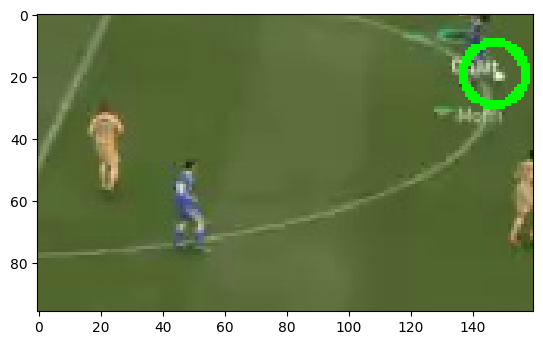

In [ ]:
# cropaya_ = crops[0]

# plt.imshow(cropaya_[5])
# plt.show

In [ ]:
blue_players = [(11, 149), (50, 87), (160, 36), (207, 158), (288, 84), (300, 104), (339, 133), (508, 194), (529, 178)]
yellow_players = [(184, 145), (225, 58), (247, 239), (297, 94), (320, 165), (332, 118), (422, 59), (424, 98), (461, 132), (507, 221)]

numCol = 3
numRow = 4
crops = []
print("Enter the target number of frames between [0 and 95] ")
user_input= int(input("The number is: "))

while True:
  if user_input < 0 or user_input > 95:
    print("Enta msh bt3rf tqra2 wala ehhh ba2olak between [0 and 95]")
    user_input= int(input("The number is: "))
  else:
    break
framaya = cv2.imread(f'Example_frame{user_input}.jpg')
framaya2RGP = cv2.cvtColor(framaya, cv2.COLOR_BGR2RGB)
for j in range(numCol):
    for i in range(numRow):
        cx = framaya2RGP.shape[1] // numRow
        cy = framaya2RGP.shape[0] // numCol
        x = i * cx
        y = j * cy

        blue_count = 0
        for player in blue_players:
            if player[0] >= x and player[1] >= y and player[0] <= x + cx and player[1] <= y + cy:
                blue_count += 1

        yellow_count = 0
        for player in yellow_players:
            if player[0] >= x and player[1] >= y and player[0] <= x + cx and player[1] <= y + cy:
                yellow_count += 1

        crops.append({'crop': framaya2RGP[y:y+cy, x:x+cx], 'blue_count': blue_count, 'yellow_count': yellow_count})

plt.figure(figsize=(12, 9))

for i in range(len(crops)):
    if i < numCol * numRow:
        plt.subplot(numCol, numRow, i+1)
        plt.imshow(crops[i]['crop'])
        plt.title("Blue: {}, Yellow: {}".format(crops[i]['blue_count'], crops[i]['yellow_count']))
        plt.axis('off')

plt.show()

Enter the target number of frames between [0 and 95] 
